# task1

main program for taska and taskb

In [22]:
import pandas as pd
from PAMI.extras.DF2DB import denseDF2DB as pro
import numpy as np
import sys


"""
this is the code to read file and convert transaction file

how to use: python3 Ex13.py <inputfile> <minScore> <outputFile>
        inputfile:str
            input file name
        minScore:float
            minimun score to get binary value
        outputFile:str
            output file name

"""

class  dataPreprocessing():
    
    def readFile(self,inputFile):
        """
        task1a:To read file
        input:
            inputFile:str   
                input file name
        output:
            dataset: pandas dataflame 
                dataset made from file
        """
        dataset=pd.read_csv(inputFile)
        dataset.set_index("Unnamed: 0",inplace=True)
        return dataset
    
    def replaceData(self,inputDF):
        """
        task1b:replace nun and data>=100
        input:
            inputDF:pandas data frame   
                dataframe you want to replace data
        output:
            dataset: pandas dataflame 
                dataset converted
        """
        inputDF=inputDF.fillna(0)
        DF=inputDF.where(inputDF<=100,0)
        DF.insert(0,"tid",range(len(DF.index)))
        DF= DF.set_index('tid')
        return DF
    def makeTransactionFile(self,inputDF,minScore,outputFile):
        """
        task1b:convert to transaction file
        input:
            inputDF:pandas data frame
                dataframe you want to convert to transanction file
            minScore: float
                minimun score to get binary value 
            outputFile:str
                output file name
        output:
        """
        
        db = pro.denseDF2DB(inputDF, thresholdValue=minScore, condition='>=')
        db.createTransactional(outputFile)
        # Getting the fileName of the transactional database
        print('The output file is saved at ' + db.getFileName())

"""
if __name__ == '__main__':
    _ap=str()
    if len(sys.argv)==4:
            inputFile=sys.argv[1]
            minScore=sys.argv[2]
            outputFile=sys.argv[3]
            x=dataPreprocessing()
            data=x.readFile(inputFile)
            DF=x.replaceData(data)
            x.makeTransactionFile(DF,minScore,outputFile)
    else:
        print("Error! The number of input parameters do not match the total number of parameters provided")
"""

'\nif __name__=="__main__":\n    x=dataPreprocessing()\n    inputFile="Ex9.csv"\n    df=x.readFile(inputFile)\n    df=x.replaceData(df)\n    output="PM24HeavyPollutionRecordingSensors.csv"\n    x.makeTransactionFile(df,15,output)\n'

##  a) reads the CSV file created in Exercise 9 as a data frame

In [23]:
x=dataPreprocessing()
inputFile="Ex9.csv"
df=x.readFile(inputFile)

### (b)[i]Replace the NaN values ​​to zero.
### (b)[ii]Replace the values ​​greater than or equal to 100 to zero
### (b)[iii]Replace the existing values in the timestamp column with 1, 2, 3, ...

In [24]:
df=x.replaceData(df)

### (b)[iv]Install PAMI repository: pip install -U PAMI, and     Read Chapter 3 at  https://udaylab.github.io/PAMI/manuals/index.html

In [13]:
pip install --upgrade pami

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### (b)[v] Implement the code "Dense data frame to transactional database" by setting >= condition and threshold value= 15.
### (b)[vi] Save the file as PM24HeavyPollutionRecordingSensors.csv. The output database represents the sensors where people were frequently exposed to harmful levels of air pollution.

In [25]:
output="PM24HeavyPollutionRecordingSensors.csv"
x.makeTransactionFile(df,15,output)

The output file is saved at PM24HeavyPollutionRecordingSensors.csv


## c) Knowledge discovery:
### i) Read and Implement Chapter 5   https://udaylab.github.io/PAMI/manuals/index.html

Database size (total no of transactions) : 744
Number of items : 1082
Minimum Transaction Size : 1
Average Transaction Size : 182.11155913978496
Maximum Transaction Size : 1003
Standard Deviation Transaction Size : 225.70670895774637
Variance in Transaction Sizes : 51012.08309635451
Sparsity : 0.8316898714050047


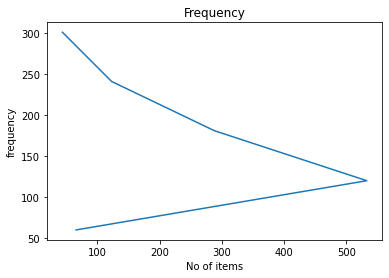

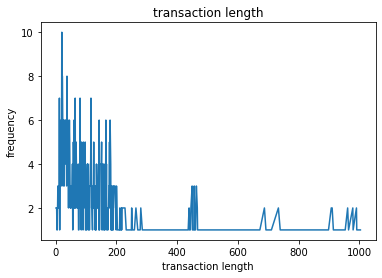

In [26]:
#import the class file
import PAMI.extras.dbStats.transactionalDatabaseStats as stats

#specify the file name
inputFile = "PM24HeavyPollutionRecordingSensors.csv"
sep='\t'
obj=stats.transactionalDatabaseStats(inputFile,sep) 
obj.run() 

obj.printStats() 
obj.plotGraphs()

### ii) Read Chapter 6 at https://udaylab.github.io/PAMI/manuals/index.html

### iii) Implement the FP-growth algorithm by reading the manual: https://udaylab.github.io/PAMI/manuals/utilization.html   Try to find yourself an appropriate minSup value. 

In [27]:
#import the frequent pattern mining algorithm
from PAMI.frequentPattern.basic import FPGrowth as alg

#inputFile = 'fileName'
inputFile = "PM24HeavyPollutionRecordingSensors.csv"

#specify the constraints used in the model
minSup=200

#create the object of the mining algorithm 
obj = alg.FPGrowth(inputFile, minSup)

#start the mining process
obj.startMine()

#Print the number of interesting patterns generated
print("Total number of Frequent Patterns:", len(obj.getPatterns()))

#Save the generated patterns in a file
obj.save('outputFile.tsv')

# Determine the memory consumed by the mining algorithm
print("Total Memory in RSS", obj.getMemoryRSS())

# Determine the total runtime consumed by the mining algorithm
print("Total ExecutionTime in seconds:", obj.getRuntime())

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total number of Frequent Patterns: 529
Total Memory in RSS 22763802624
Total ExecutionTime in seconds: 0.9636247158050537


### iv) Store the patterns in a file, say frequentPatterns.txt

In [28]:
obj.save("frequentPatterns.txt")

## d) Visualization:
### i) Write a Python code that read the frequentPatterns.txt file, identifies the longest pattern, and shows it on a plotly express open street map.

In [57]:
import sys
import pandas as pd
import plotly.express as px
import numpy as np


"""
this is the code to read file, find the longest pattern and show it in map.

how to use: python3 Ex132.py <inputfile>
        inputfile:str
            input file name

"""

class showLongestPatternLocation():
    """
    """
    
    
    def readFile(sef,inputFile):
        """
        to read the file and save longest pattren
        
        input:
            inputFile:str
                input file name
        """
        max=0
        with open(inputFile,"r") as f:
            for line in f:
                line.strip()
                temp = [i.rstrip() for i in line.split(":")]
                temp = [i.rstrip() for i in temp[0].split("\t")]
                temp = [x for x in temp if x ]
                if len(temp)>max:
                    maxPattern=temp
                    max=len(temp)
        return maxPattern
    
    def covertLocationToDF(self,maxPattern):
        """
                make dataset has location and how many time it is in dataset
                input:
                    maxpattern:list
                        longest pattern 
        """
        fd=pd.DataFrame(columns=['Lat', 'Lon'])
        for loc in maxPattern:
            loc=loc.replace("POINT(",'')
            loc=loc.replace(")",'')
            loc=loc.split(' ')
            lat=loc[0]
            lon=loc[1]
            fd.loc[fd.shape[0]] =[lon,lat]
        return fd
    def showPoints(self,fd):
        """
        To make a graph by Plotly
        input:
            fd:pandas dataframe
                To store the location (lat and lon)
        """
        ##set scatter_mapbox to make a graph
        fig = px.scatter_mapbox(fd,
        
        lat="Lat",
        lon="Lon",
        center =dict(lon=-139.89,lat=37.51),
        zoom=3, height=600
        )

        #custom the graph
        fig.update_layout(mapbox_style='open-street-map',
        mapbox_zoom=4,
        mapbox_center_lon=139.89,
        mapbox_center_lat=37.51,
        margin={"r":0,"t":0,"l":0,"b":0}
        )
        n = len(fd)
        scatter = fig.data[0]
        colors = ['blue'] * n
        scatter.marker.color = colors
        scatter.marker.size = [20] * n
        fig.show()
"""
if __name__ == '__main__':
    _ap=str()
    if len(sys.argv)==2:
            inputFile=sys.argv[1]
            x=showLongestPatternLocation()
            pattren=x.readFile(inputFile)
            DF=x.covertLocationToDF(pattern)
            x.showPoints(DF)
    else:
        print("Error! The number of input parameters do not match the total number of parameters provided")
"""

'\nif __name__ == \'__main__\':\n    _ap=str()\n    if len(sys.argv)==2:\n            inputFile=sys.argv[1]\n            x=showLongestPatternLocation()\n            pattren=x.readFile(inputFile)\n            DF=x.covertLocationToDF(pattern)\n            x.showPoints(DF)\n    else:\n        print("Error! The number of input parameters do not match the total number of parameters provided")\n'

          Lat          Lon
0  33.5738695  130.3165995
1  33.2769087  129.9041873
2  33.6051041  130.4105582
3  33.5854231  130.2527462


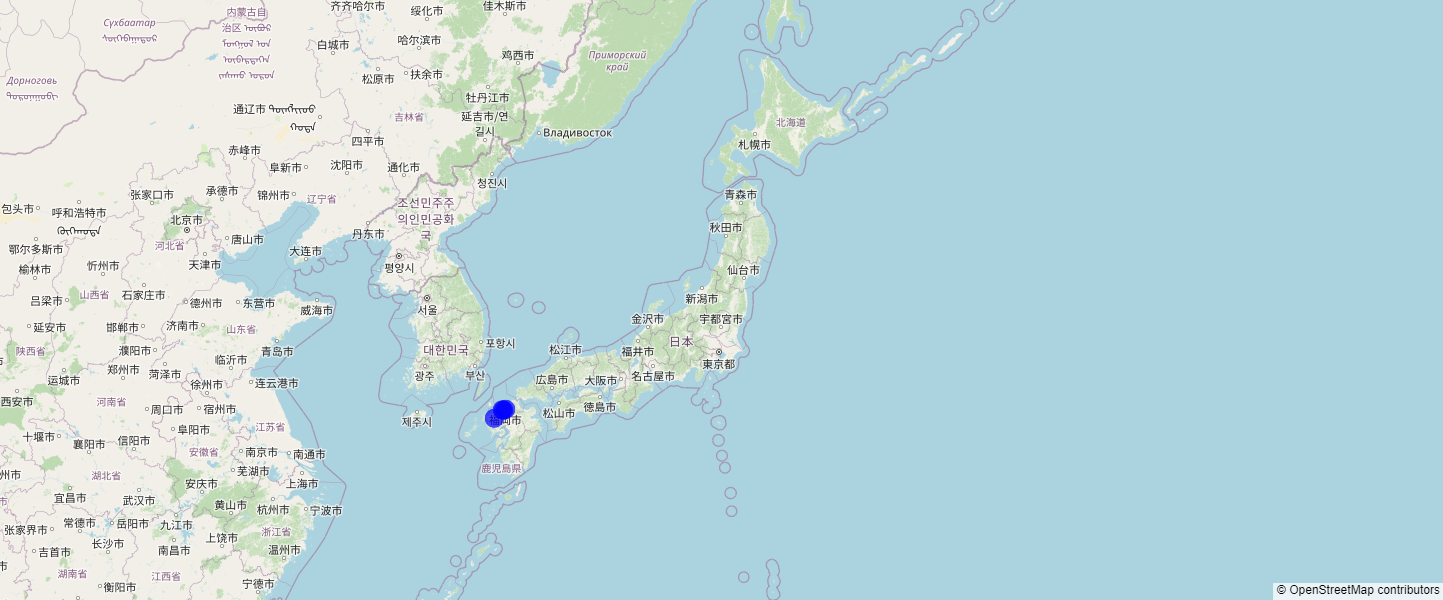

In [58]:
inputFile="frequentPatterns.txt"
x=showLongestPatternLocation()
pattern=x.readFile(inputFile)
DF=x.covertLocationToDF(pattern)
print(DF)
x.showPoints(DF)